<a href="https://colab.research.google.com/github/HarshaniDil/Tourist_prediction/blob/main/NewTourism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from sklearn import linear_model

url='https://raw.githubusercontent.com/HarshaniDil/Tourist_prediction/main/Assignment%20-%20Sheet1.csv'
df=pd.read_csv(url)
df
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)
indexedDataset = df.set_index(['Month'])

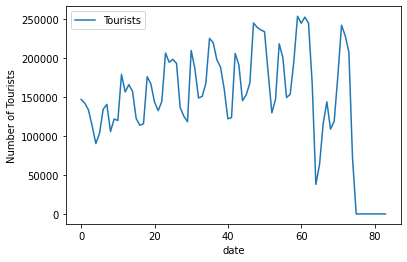

In [12]:
df.plot(xlabel='date', ylabel='Number of Tourists')

In [22]:
results_ARIMA.plot_predict(1,264)
x=results_ARIMA.forecast(steps=120)

NameError: ignored